In [1]:
from matplotlib import pyplot as plt
import os, json, re, random, io, pytz, itertools, shutil
from matplotlib.patches import Circle, Wedge, Polygon, Rectangle
from pprint import pprint
from PIL import Image
from tqdm import tqdm
import pandas as pd

In [14]:
SIZES = [7, 8, 9, 10, 11, 12]
X_OFFSETS = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
Y_OFFSETS = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
COLORS = {
    "red": "#ff0000", 
    "blue": "#0000ff", 
    "green": "#008000",
    "black": "#000000",
    "pink": "#ff69b4", 
    "yellow": "#ffff00",
    "purple": "#800080",
    "orange": "#FFA500",
    "cyan": "#00FFFF",
    "brown": "#A52A2A",
    "grey": "#808080",
    "lime":"#00FF00",

    "sky blue": "#87CEEB",
    "turquoise": "#40E0D0",
    "dark cyan": "#008B8B",
    "yellow green": "#9ACD32",
    "pale green": "#98FB98",
    "olive": "#808000",
    "deep pink": "#FF1493",
    "light salmon": '#FFA07A',
    "dark khaki": '#BDB76B',
    "medium orchid": '#BA55D3',
    "slate blue": '#6A5ACD',
    "rosy brown": '#BC8F8F',
    "saddle brown": '#8B4513',
    "light grey": '#D3D3D3',
    "gold": '#FFD700',
    "powder blue": "#B0E0E6",
    "burly wood": "#DEB887",
    "navy": "000080",
}


In [7]:
11*11*6*12

8712

In [15]:
im_count = 0
layout_count = 0
pairs = []
annotations = {
      "metadata": {
            "colors": COLORS,
            "sizes": SIZES,
            "x_offsets": X_OFFSETS,
            "y_offsets": Y_OFFSETS,
      }
}
dir = "../data/matplotlib/colored_single_sq"
if os.path.exists(f"{dir}/images/"): 
      os.system(f"rm -rf {dir}/images/*")
else:
      os.makedirs(f"{dir}/images/")
for c1 in COLORS:
      for r1, ox, oy in tqdm(itertools.product(SIZES, X_OFFSETS, Y_OFFSETS), total=len(SIZES)*len(X_OFFSETS)*len(Y_OFFSETS)):
            plt.ioff() # disable plt.show()
            fig = plt.figure(dpi=8, figsize=(4,4)) # The resulting resolution will be 128x128
            W, H = fig.get_size_inches()*fig.dpi
            fig.patches.append(Rectangle((0.5 - (r1+ox)/2.0/W, 0.5 - (r1+oy)/H/2), r1/W, r1/H, facecolor=COLORS[c1], transform=fig.transFigure))
            plt.axis('off')
            imgid = str(im_count+10000000)[1:]
            fig.savefig(f"{dir}/images/{imgid}.jpg")
            plt.close(fig)

            sentences = []
            article = "an" if c1[0] in "aeiou" else "a"
            sentences.append({
                  "imgid": imgid,
                  "raw": f"{article} {c1} square",
                  "sentid": f"{imgid}"
            })
            pairs.append({
                  "imgid": imgid,
                  "filename": f"{imgid}.jpg",
                  "sentences": sentences,
            })
            im_count += 1
      layout_count += 1
      #break
annotations['data'] = pairs
json.dump(annotations, open(f"{dir}/annotations.json", "w"), indent=2)


  2%|▏         | 11/726 [00:00<00:06, 108.84it/s]

100%|██████████| 726/726 [00:06<00:00, 107.28it/s]


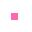

In [16]:
filename = random.choice(os.listdir(f"{dir}/images"))
im = Image.open(f"{dir}/images/{filename}").convert("RGB")
im

In [26]:
train = pd.DataFrame(columns=["sentid", "filename", "sentence"])
train.set_index("sentid")
test = pd.DataFrame(columns=["sentid", "filename", "sentence"])
test.set_index("sentid")
pairs = json.load(open(f"{dir}/annotations.json", "r"))["data"]
print(len(pairs))

8712


In [27]:
pprint(pairs[0])

{'filename': '0000000.jpg',
 'imgid': '0000000',
 'sentences': [{'imgid': '0000000',
                'raw': 'a red square',
                'sentid': '0000000'}]}


In [28]:
# random 80:20 split
for d in pairs:
    row = {
        "sentid": [d['sentences'][0]['sentid']],
        "filename": [d['filename']],
        "sentence": [d['sentences'][0]['raw']]
    }
    row = pd.DataFrame(row)
    if random.random() < 0.8:
        train = pd.concat([train, pd.DataFrame(row)])
    else:
        test = pd.concat([test, pd.DataFrame(row)])
print(len(train), len(test))
train.to_csv(f"{dir}/random_80_20_split/train.csv", index=False)
test.to_csv(f"{dir}/random_80_20_split/test.csv", index=False)


7041 1671


In [29]:
#train.reset_index(drop=True)
train.head()

,sentid,filename,sentence
0,0000000,0000000.jpg,a red square
0,0000001,0000001.jpg,a red square
0,0000002,0000002.jpg,a red square
0,0000003,0000003.jpg,a red square
0,0000008,0000008.jpg,a red square


In [31]:
from datasets import load_dataset
data = load_dataset(f"{dir}/random_80_20_split", split="test")
print(len(data))
data[1000]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

1671


{'sentid': 5282, 'filename': '0005282.jpg', 'sentence': 'an orange square'}